In [1]:
#Q2)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

df = pd.read_csv("/content/online+shoppers+purchasing+intention+dataset.zip")

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['Month', 'VisitorType']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

X = df.drop(columns=['Revenue'])
y = df['Revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=5, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Accuracy: 0.9035


In [2]:
#Q3)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("/content/online+shoppers+purchasing+intention+dataset.zip")

label_encoders = {}
for col in ['Month', 'VisitorType']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Weekend'] = df['Weekend'].astype(int)

df = df.dropna()

df['Revenue'] = df['Revenue'].astype(float)

X = df.drop(columns=['Revenue'])
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "MLP": MLPRegressor()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mse, mae, r2])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "MAE", "R2 Score"])
print(results_df)


           Model       MSE       MAE  R2 Score
0            SVR  0.088943  0.172376  0.359611
1  Decision Tree  0.139903  0.139903 -0.007299
2  Random Forest  0.076301  0.146208  0.450630
3       AdaBoost  0.078882  0.151105  0.432046
4        XGBoost  0.085900  0.156995  0.381521
5            MLP  0.085542  0.173112  0.384098


In [3]:
#Q4)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/content/online+shoppers+purchasing+intention+dataset.zip")

label_encoders = {}
for col in ['Month', 'VisitorType']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Weekend'] = df['Weekend'].astype(int)

df = df.dropna()

X = df.drop(columns=['Revenue'])
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "Naïve Bayes": GaussianNB(),
    "MLP": MLPClassifier()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, precision, recall, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df)


           Model  Accuracy  Precision    Recall  F1 Score
0            SVM  0.880373   0.737705  0.437956  0.549618
1  Decision Tree  0.857259   0.571429  0.574209  0.572816
2  Random Forest  0.891322   0.739130  0.537713  0.622535
3       AdaBoost  0.887672   0.699405  0.571776  0.629183
4        XGBoost  0.893755   0.732087  0.571776  0.642077
5    Naïve Bayes  0.790754   0.421991  0.690998  0.523985
6            MLP  0.884834   0.690691  0.559611  0.618280


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


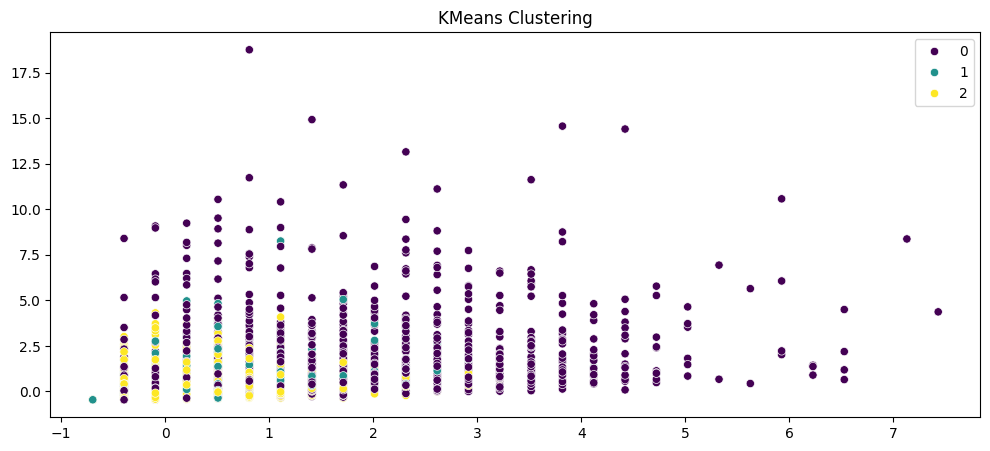

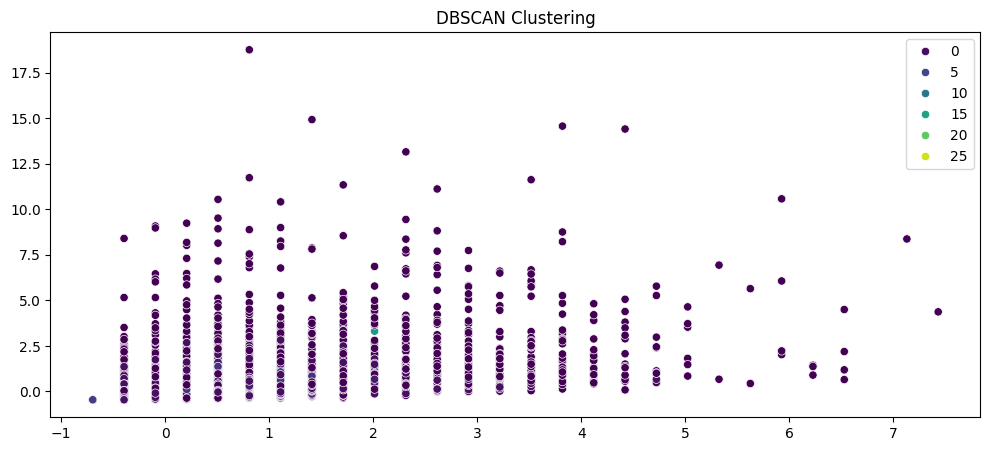

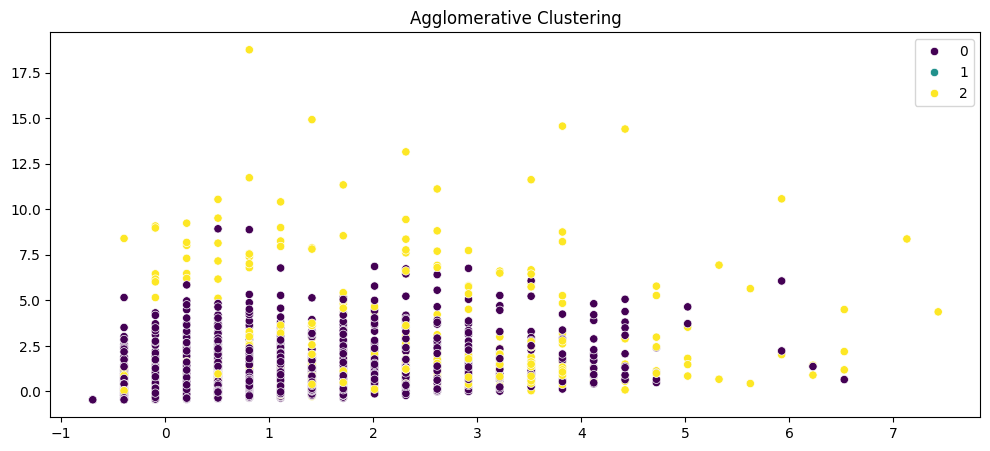

KMeans_Cluster  DBSCAN_Cluster  Agglomerative_Cluster
2                0              0                        5525
                 1              0                        1352
                -1              0                         920
0               -1              0                         895
1                3              0                         856
2                0              1                         596
0               -1              2                         593
1               -1              0                         485
                 4              0                         286
0                0              0                         266
2                1              1                         108
                 8              0                          75
                -1              1                          64
0                1              0                          55
2                5              0                          48
1               

In [4]:
#Q5)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/online+shoppers+purchasing+intention+dataset.zip")

label_encoders = {}
for col in ['Month', 'VisitorType']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Weekend'] = df['Weekend'].astype(int)

df = df.dropna()

X = df.drop(columns=['Revenue'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

df['KMeans_Cluster'] = kmeans_labels
df['DBSCAN_Cluster'] = dbscan_labels
df['Agglomerative_Cluster'] = agglo_labels

plt.figure(figsize=(12, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agglo_labels, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

print(df[['KMeans_Cluster', 'DBSCAN_Cluster', 'Agglomerative_Cluster']].value_counts())